# Pixel Boundaries

This notebook demonstrates the pixel boundaries for the various PSM3 datasets.  In particular:

| Nominal Pixel Size | Dataset Examples         | Pixel Dimensions | Longitude Boundaries             | Latitude Boundaries           |
|--------------------|--------------------------|------------------|----------------------------------|-------------------------------|
| 4 km               | PSM3 TMY, PSM3 30-minute | 0.04° by 0.04°   | ..., -80.04, -80.00, -79.96, ... | ..., 39.95, 39.99, 40.03, ... |
| 2 km               | PSM3 5-minute            | 0.02° by 0.02°   | ..., -80.02, -80.00, -79.98, ... | ..., 39.97, 39.99, 40.01, ... |

Additionally, the lat/lon coordinates returned in the metadata of the API response correspond to the center of the pixel.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pvlib

In [3]:
phi = (1 + np.sqrt(5)) / 2  # golden ratio

def sunflower(n, alpha=0, geodesic=False):
    points = []
    angle_stride = 360 * phi if geodesic else 2 * np.pi / phi ** 2
    b = np.round(alpha * np.sqrt(n))  # number of boundary points
    for k in range(1, n + 1):
        r = radius(k, n, b)
        theta = k * angle_stride
        points.append((r * np.cos(theta), r * np.sin(theta)))
    return points

def radius(k, n, b):
    if k > n - b:
        return 1.0
    else:
        return np.sqrt(k - 0.5) / np.sqrt(n - (b + 1) / 2)

In [4]:
r = 0.06  # degrees
center = (40, -80)
pts = sunflower(40)
lons = [center[1] + pt[1] * r for pt in pts]
lats = [center[0] + pt[0] * r for pt in pts]

In [48]:
kwargs = {
    'api_key': 'ESntbO4ouJNusYXtOovrJzCES44o11bKGq6TqGap',
    'email': 'kevinanderso@gmail.com',
    'attributes': ['ghi'],
    'map_variables': True,
    'leap_day': True,
}

In [60]:
def plot(results, grid_spacing):
    fig, ax = plt.subplots()
    norm = plt.Normalize(out['annual_ghi'].min(), out['annual_ghi'].max())
    cmap = plt.get_cmap('tab20')

    for _, row in out.iterrows():
        ax.plot([row['lon_norm'], row['lon']], [row['lat_norm'], row['lat']], c=cmap(norm(row['annual_ghi'])))
        ax.scatter([row['lon']], [row['lat']], color=cmap(norm(row['annual_ghi'])))

    xs = np.arange(-80.08, -79.88, grid_spacing)
    xs = xs[(xs > out['lon'].min()) & (xs < out['lon'].max())]

    ys = np.arange(39.87, 49.11, grid_spacing)
    ys = ys[(ys > out['lat'].min()) & (ys < out['lat'].max())]

    for x in xs:
        ax.axvline(x, c='grey', ls=':')

    for y in ys:
        ax.axhline(y, c='grey', ls=':')

## TMY (4 km)

In [20]:
results = []

for lat, lon in zip(lats, lons):
    df, meta = pvlib.iotools.get_psm3(lat, lon, names='tmy', **kwargs)
    results.append({
        'lat': lat,
        'lon': lon,
        'lat_norm': meta['latitude'],
        'lon_norm': meta['longitude'],
        'annual_ghi': df['ghi'].resample('h').mean().sum()
    })

out = pd.DataFrame(results)

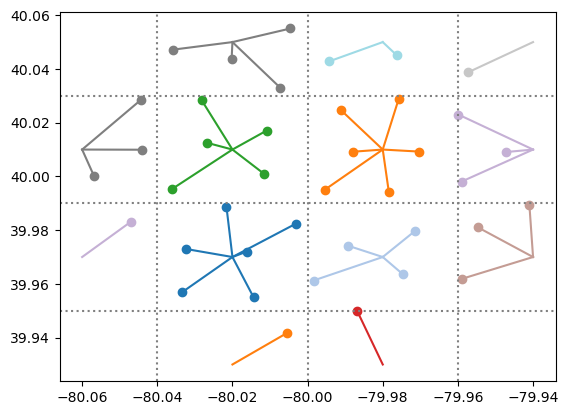

In [46]:
plot(out, 0.04)

## 30-minute (4 km)

In [49]:
results = []

for lat, lon in zip(lats, lons):
    df, meta = pvlib.iotools.get_psm3(lat, lon, names='2020', interval=30, **kwargs)
    results.append({
        'lat': lat,
        'lon': lon,
        'lat_norm': meta['latitude'],
        'lon_norm': meta['longitude'],
        'annual_ghi': df['ghi'].resample('h').mean().sum()
    })

out = pd.DataFrame(results)

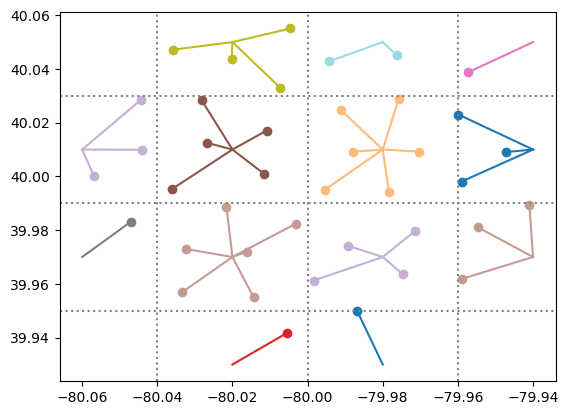

In [50]:
plot(out, 0.04)

## 5-minute (2 km)

In [ ]:
results = []

for lat, lon in zip(lats, lons):
    df, meta = pvlib.iotools.get_psm3(lat, lon, names='2020', interval=5, **kwargs)
    results.append({
        'lat': lat,
        'lon': lon,
        'lat_norm': meta['latitude'],
        'lon_norm': meta['longitude'],
        'annual_ghi': df['ghi'].resample('h').mean().sum()
    })

out = pd.DataFrame(results)

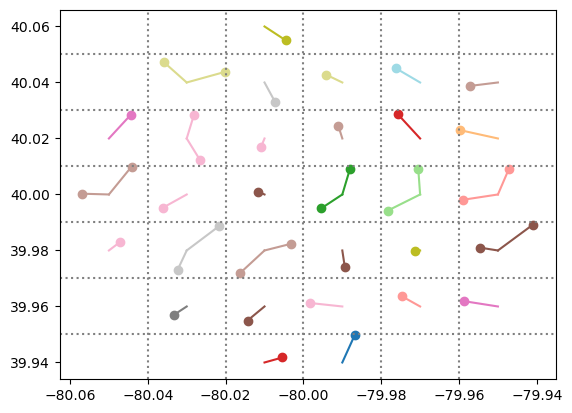

In [61]:
plot(out, 0.02)

In [ ]:
%load_ext watermark
%watermark --iversions -u -d -t

Last updated: 2022-09-27 21:45:50

pvlib     : 0.9.3
matplotlib: 3.5.2
numpy     : 1.22.3
pandas    : 1.5.0

